In [1]:
%matplotlib inline

import sys
sys.path.append("../")
import copy
import itertools
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.simplefilter('ignore')



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import files
uploaded = files.upload()

In [5]:
dataframe=pd.read_csv('covid_19_clean_complete (1).csv', parse_dates=['Date'])
dataframe['Province/State']=dataframe['Province/State'].fillna('')
dataframe.rename(columns={'Country/Region':'Country','Province/State':'State'},inplace=True)
dataframe

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,,Afghanistan,33.000000,65.000000,2020-01-22,0,0,0
1,,Albania,41.153300,20.168300,2020-01-22,0,0,0
2,,Algeria,28.033900,1.659600,2020-01-22,0,0,0
3,,Andorra,42.506300,1.521800,2020-01-22,0,0,0
4,,Angola,-11.202700,17.873900,2020-01-22,0,0,0
...,...,...,...,...,...,...,...,...
32060,,Sao Tome and Principe,0.186360,6.613081,2020-05-21,251,8,4
32061,,Yemen,15.552727,48.516388,2020-05-21,197,33,0
32062,,Comoros,-11.645500,43.333300,2020-05-21,34,1,8
32063,,Tajikistan,38.861034,71.276093,2020-05-21,2350,44,0


In [6]:
q=dataframe.query('Country=="Germany"')
df=q.fillna('').groupby(['Date'])['Confirmed'].max()
df=pd.DataFrame(df)


df.head(20)

,Confirmed
Date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
2020-01-27,1
2020-01-28,4
2020-01-29,4
2020-01-30,4


In [7]:
train = df[0:97]
test = df[97:]
ploting = df[45:97]

In [8]:

column_name = df.columns[0]


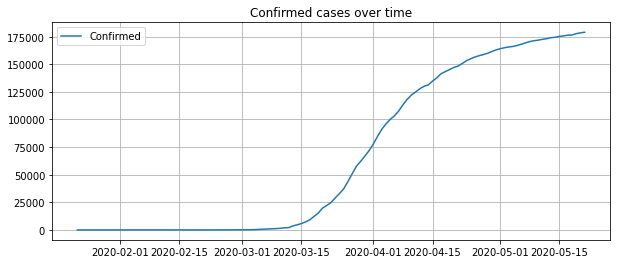

In [9]:
plt.figure(figsize=(10,4))
plt.plot(df, label=column_name)
plt.legend(loc="best")
plt.title("%s cases over time" %df.columns[0])
plt.grid()
plt.show()

In [10]:
df.tail()

,Confirmed
Date,
2020-05-17,176369
2020-05-18,176551
2020-05-19,177778
2020-05-20,178473
2020-05-21,179021


In [11]:
def fit_model(series, config):
    order, sorder, trend = config
    model = SARIMAX(series[column_name], order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
    result = model.fit()
    return result

In [12]:
# root mean squared error
def measure_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

In [13]:
#best = [(1,1,1),(0,1,1,5), 'n']
bests=[(1, 2, 1), (1, 1, 1, 5), 'n']
result = fit_model(train, bests)
#result=get_forecast(steps=500)
#predictions1 = result.predic0(start=80, end=121)
#yhat = fit_model.forecast()[0]
#result.plot_predict(start=int(len(train) * 0.6), end=int(len(train) * 2.0))
prediction=result.forecast(steps=len(test))
prediction

2020-04-28    159585.519240
2020-04-29    160381.618046
2020-04-30    161262.405062
2020-05-01    162041.056259
2020-05-02    163263.897346
2020-05-03    164192.057137
2020-05-04    165028.031036
2020-05-05    165918.123639
2020-05-06    166688.473770
2020-05-07    167903.154349
2020-05-08    168815.389606
2020-05-09    169631.449166
2020-05-10    170499.520429
2020-05-11    171246.701932
2020-05-12    172437.744718
2020-05-13    173325.971833
2020-05-14    174117.827447
2020-05-15    174961.590342
2020-05-16    175684.407262
2020-05-17    176851.057562
2020-05-18    177714.875437
2020-05-19    178482.312876
2020-05-20    179301.652818
2020-05-21    180000.044221
Freq: D, dtype: float64

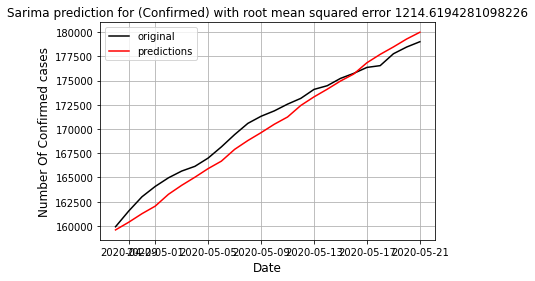

In [14]:
#result.plot_predict(start=int(len(test) * 0.6), end=int(len(test) * 2.0))
plt.figure(figsize=(6,4))
plt.plot(test, label="original" ,color='black')
plt.plot(prediction, color="red", label="predictions")
plt.grid()
error = measure_rmse(test, prediction)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number Of Confirmed cases', fontsize=12)
plt.legend(loc='best')
plt.title("Sarima prediction for (%s) with root mean squared error %s" % (column_name, error))
plt.show()

In [18]:
# Get forecast 90 steps ahead in future
forecastt = result.get_forecast(steps=90)
forecastt

# Get confidence intervals of forecasts
forecast_conf = forecastt.conf_int()


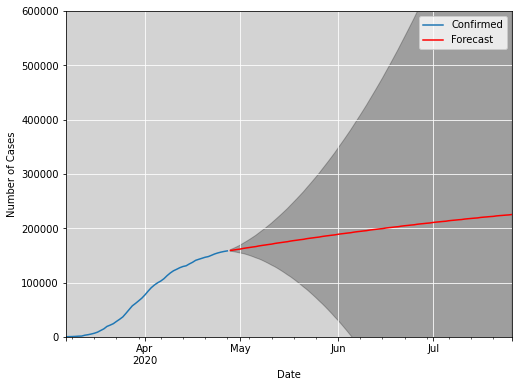

In [17]:
ax = ploting.plot(label='observed', figsize=(8, 6))
forecastt.predicted_mean.plot(ax=ax, label='Forecast', color='red')

ax.set_xlabel('Date')
ax.set_ylabel('Number of Cases')
ax.fill_between(forecast_conf.index,
                forecast_conf.iloc[:, 1],
                       forecast_conf.iloc[:, 0], color='k', alpha=.25)

plt.grid(color='white')
bg_color = 'lightgrey'
ax.patch.set_facecolor(bg_color)
axes = plt.gca()
axes.set_ylim([0,600000])       
plt.legend()
plt.show()

 **Recovered**  **Cases**

In [19]:
qc=dataframe.query('Country=="Germany"')
dfr=q.fillna('').groupby(['Date'])['Recovered'].max()
dfr=pd.DataFrame(dfr)

In [20]:
dfr

,Recovered
Date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2020-05-17,154011
2020-05-18,155041
2020-05-19,155681


In [21]:
column_name = dfr.columns[0]


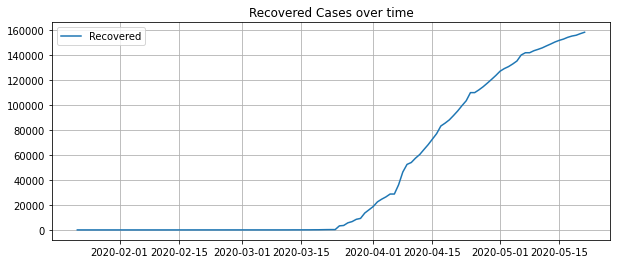

In [22]:
plt.figure(figsize=(10,4))
plt.plot(dfr, label=column_name)
plt.legend(loc="best")
plt.title("%s Cases over time" %dfr.columns[0])
plt.grid()
plt.show()

In [23]:
Train = dfr[0:97]
Test = dfr[97:]
ploting1 = dfr[45:97]

In [24]:
best=[(2, 1, 2), (2, 1, 2, 5), 'n']
results = fit_model(Train, best)
Prediction=results.forecast(steps=len(Test))
Prediction

2020-04-28    116990.492168
2020-04-29    118665.059197
2020-04-30    120931.934005
2020-05-01    122343.245176
2020-05-02    126213.946061
2020-05-03    128779.544430
2020-05-04    130827.602817
2020-05-05    132189.342390
2020-05-06    133971.978215
2020-05-07    136223.328654
2020-05-08    138601.544314
2020-05-09    142043.651973
2020-05-10    142527.002814
2020-05-11    143871.817939
2020-05-12    146620.487239
2020-05-13    148872.628305
2020-05-14    150596.809488
2020-05-15    152310.303658
2020-05-16    153883.877048
2020-05-17    157044.732446
2020-05-18    159643.716413
2020-05-19    162504.237769
2020-05-20    163703.060901
2020-05-21    165546.266228
Freq: D, dtype: float64

In [25]:
Test

,Recovered
Date,
2020-04-28,117400
2020-04-29,120400
2020-04-30,123500
2020-05-01,126900
2020-05-02,129000
2020-05-03,130600
2020-05-04,132700
2020-05-05,135100
2020-05-06,139900


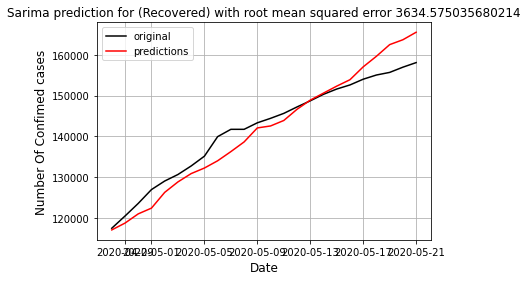

In [26]:
plt.figure(figsize=(6,4))
plt.plot(Test, label="original" ,color='black')
plt.plot(Prediction, color="red", label="predictions")
plt.grid()
error = measure_rmse(Test, Prediction)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number Of Confimed cases', fontsize=12)
plt.legend(loc='best')
plt.title("Sarima prediction for (%s) with root mean squared error %s" % (column_name, error))
plt.show()

In [27]:
# Get forecast 90 steps ahead in future
forecastt = results.get_forecast(steps=90)
forecastt

# Get confidence intervals of forecasts
forecast_conf = forecastt.conf_int()


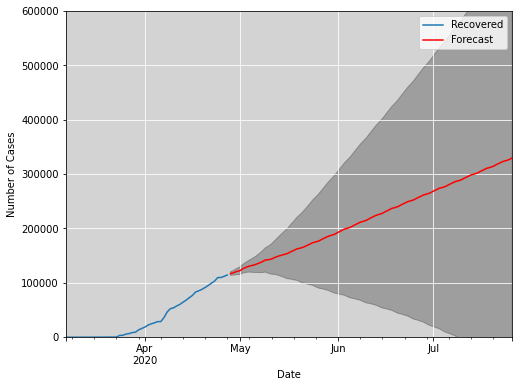

In [28]:
ax = ploting1.plot(label='observed', figsize=(8, 6))
forecastt.predicted_mean.plot(ax=ax, label='Forecast', color='red')

ax.set_xlabel('Date')
ax.set_ylabel('Number of Cases')
ax.fill_between(forecast_conf.index,
                forecast_conf.iloc[:, 1],
                       forecast_conf.iloc[:, 0], color='k', alpha=.25)

plt.grid(color='white')
bg_color = 'lightgrey'
ax.patch.set_facecolor(bg_color)
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
axes.set_ylim([0,600000])       
plt.legend()
plt.show()

In [ ]:
#

***Deaths*** **Cases**


In [29]:
q=dataframe.query('Country=="Germany"')
df=q.fillna('').groupby(['Date'])['Deaths'].max()
dfd=pd.DataFrame(df)


dfd

,Deaths
Date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2020-05-17,7962
2020-05-18,8003
2020-05-19,8081


In [31]:
column_name = dfd.columns[0]


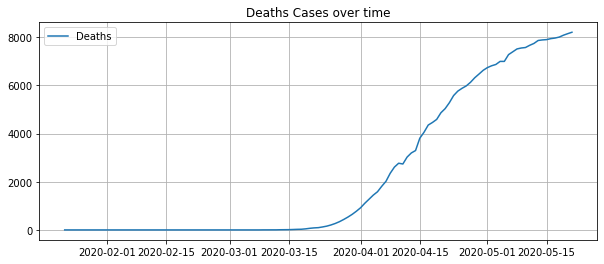

In [32]:
plt.figure(figsize=(10,4))
plt.plot(dfd, label=column_name)
plt.legend(loc="best")
plt.title("%s Cases over time" %dfd.columns[0])
plt.grid()
plt.show()

In [33]:
Traind = dfd[0:97]
Testd = dfd[97:]
ploting2 = dfd[45:97]

In [43]:
best_combination=[(2, 2, 2), (2, 0, 2, 7), 'n']
resultd = fit_model(Traind, best_combination)
Prediction1=resultd.forecast(steps=len(Testd))
Prediction1

2020-04-28    6293.425767
2020-04-29    6420.365491
2020-04-30    6613.307082
2020-05-01    6750.261065
2020-05-02    6858.938215
2020-05-03    6950.835501
2020-05-04    7060.836365
2020-05-05    7193.336106
2020-05-06    7279.922702
2020-05-07    7409.968865
2020-05-08    7515.689335
2020-05-09    7618.759935
2020-05-10    7713.404657
2020-05-11    7807.715909
2020-05-12    7917.688186
2020-05-13    8003.010074
2020-05-14    8104.483305
2020-05-15    8201.510523
2020-05-16    8301.377633
2020-05-17    8399.618019
2020-05-18    8493.933497
2020-05-19    8594.038536
2020-05-20    8687.121454
2020-05-21    8782.198796
Freq: D, dtype: float64

In [44]:
Testd

,Deaths
Date,
2020-04-28,6314
2020-04-29,6467
2020-04-30,6623
2020-05-01,6736
2020-05-02,6812
2020-05-03,6866
2020-05-04,6993
2020-05-05,6993
2020-05-06,7275


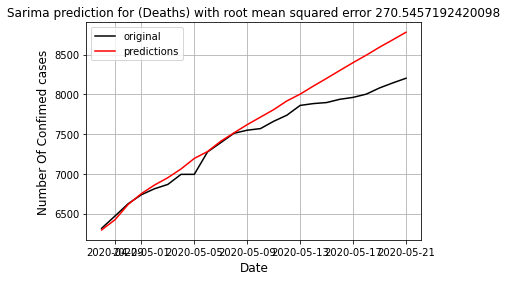

In [45]:
plt.figure(figsize=(6,4))
plt.plot(Testd, label="original" ,color='black')
plt.plot(Prediction1, color="red", label="predictions")
plt.grid()
error = measure_rmse(Testd, Prediction1)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number Of Confimed cases', fontsize=12)
plt.legend(loc='best')
plt.title("Sarima prediction for (%s) with root mean squared error %s" % (column_name, error))
plt.show()

In [48]:
# Get forecast 90 steps ahead in future
forecastt = resultd.get_forecast(steps=90)
forecastt

# Get confidence intervals of forecasts
forecast_conf = forecastt.conf_int()

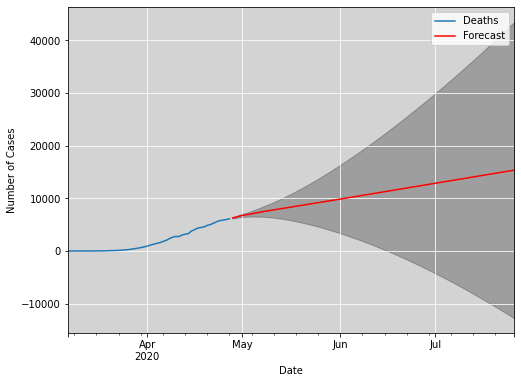

In [50]:
ax = ploting2.plot(label='observed', figsize=(8, 6))
forecastt.predicted_mean.plot(ax=ax, label='Forecast', color='red')

ax.set_xlabel('Date')
ax.set_ylabel('Number of Cases')
ax.fill_between(forecast_conf.index,
                forecast_conf.iloc[:, 1],
                       forecast_conf.iloc[:, 0], color='k', alpha=.25)

plt.grid(color='white')
bg_color = 'lightgrey'
ax.patch.set_facecolor(bg_color)
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
#axes.set_ylim([0,600000])       
plt.legend()
plt.show()